In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### easy  
##### посмотреть, по каким переменным имеет смысл объединять пользователей в группы (например, используя `sns.pairplot`). Можно взять все признаки. Провести кластеризацию, подобрав количество кластеров "на глаз"

In [40]:
df_crc = pd.read_csv('data/credit_card.csv')
df_crc = df_crc.drop(['CUST_ID'],1).dropna()
df_crc.head()

C:\Users\79216\AppData\Local\Temp/ipykernel_19884/2159105820.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_crc = df_crc.drop(['CUST_ID'],1).dropna()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

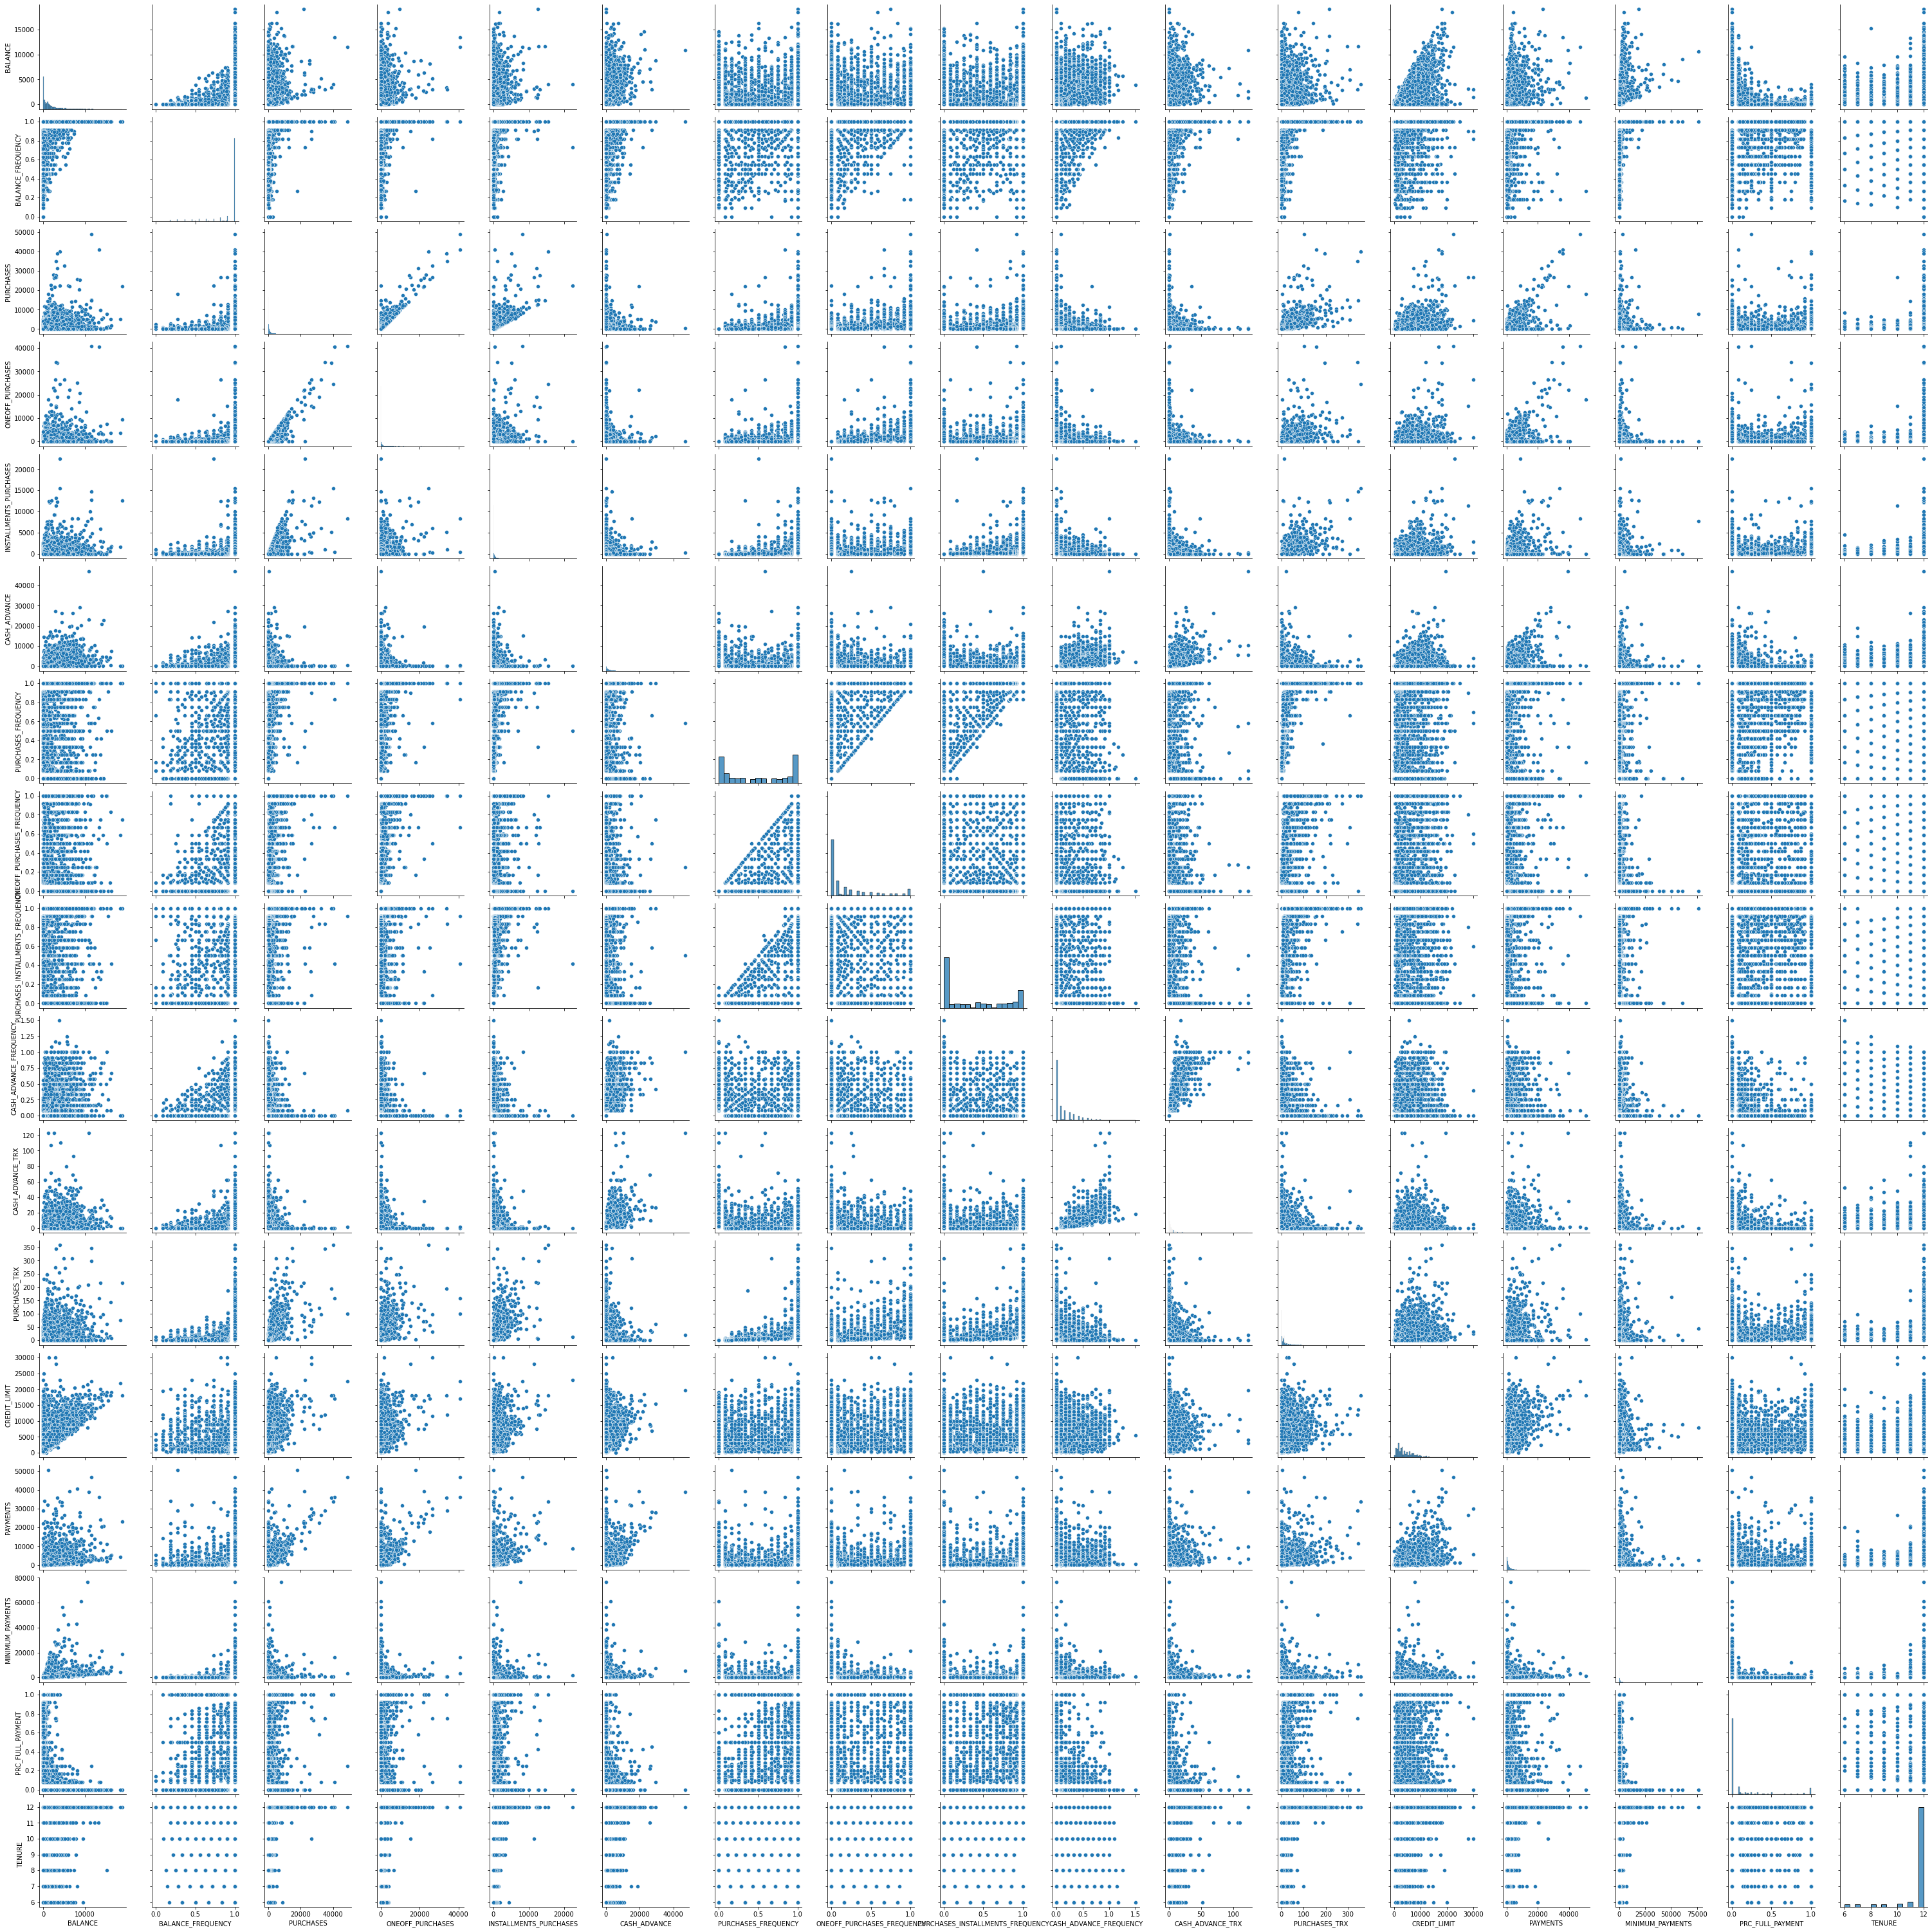

In [10]:
sns.pairplot(df_crc)

кластеризация по всем признакам

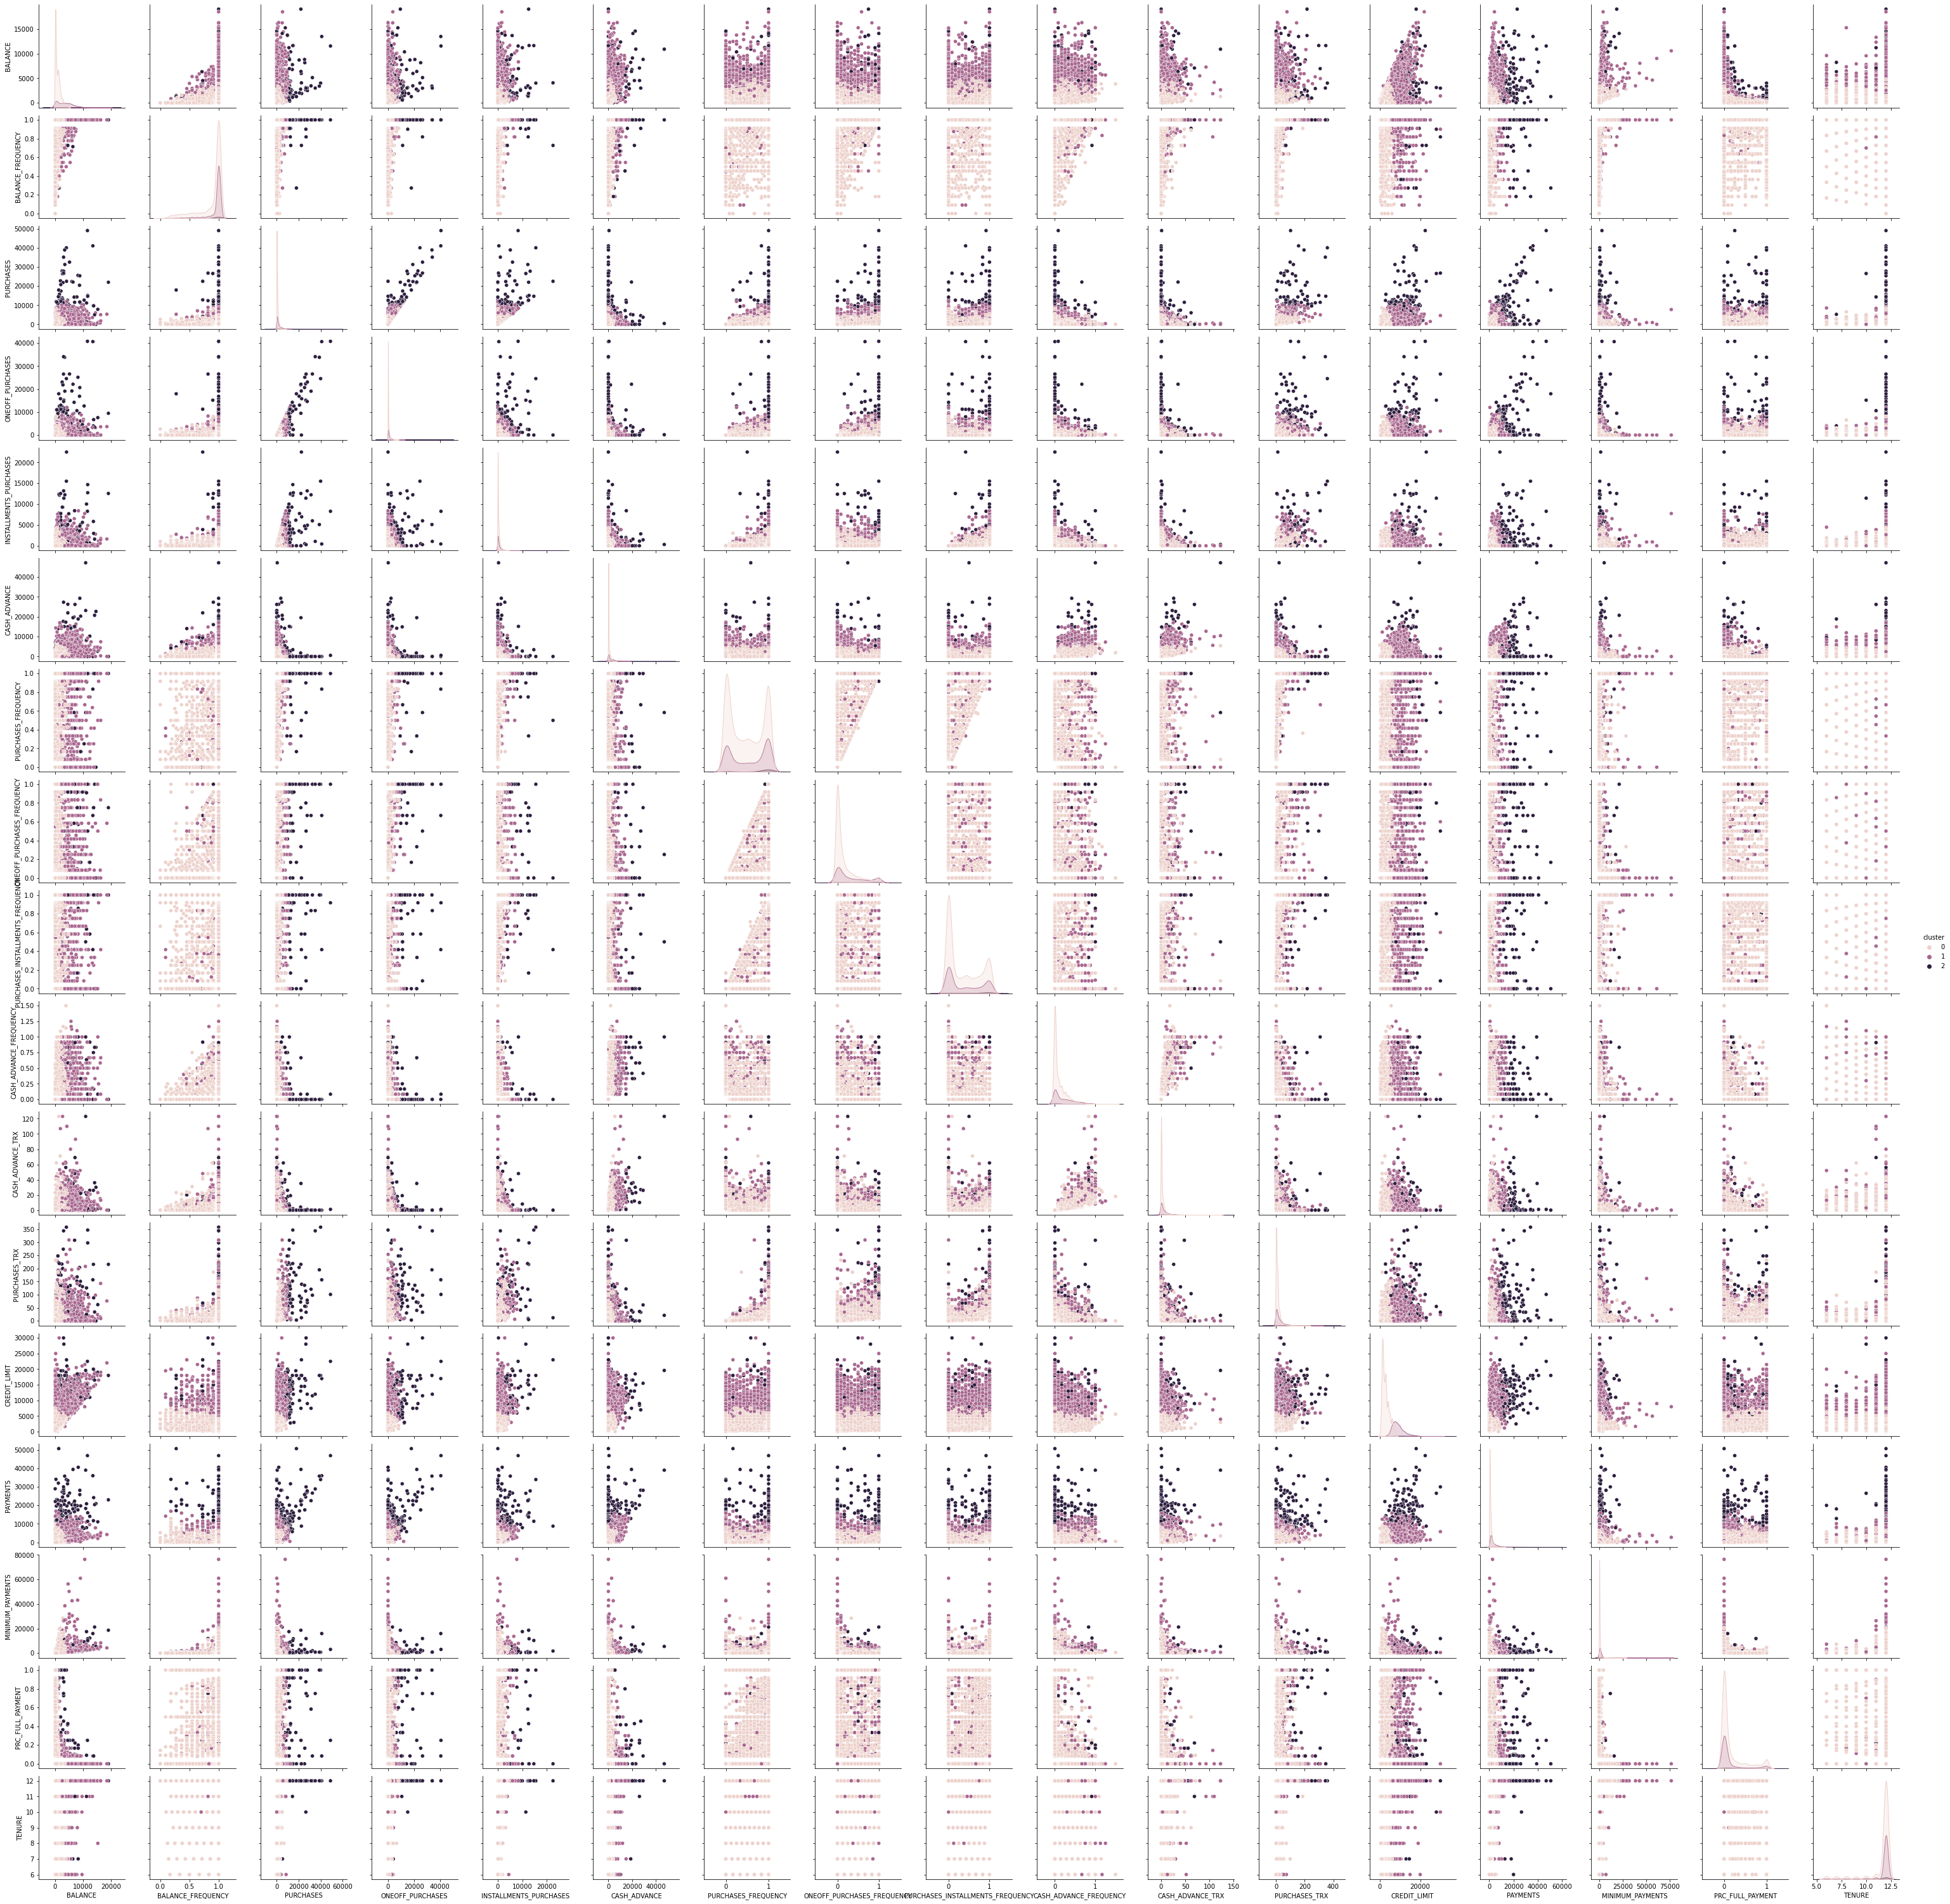

In [13]:
model_crc = KMeans(3)
labels = model_crc.fit_predict(df_crc.values)
df_crc['cluster'] = labels
sns.pairplot(df_crc, hue='cluster')

кластеризация по трём признакам: баланс, лимит кредитной карты и оплаченный процент от полной суммы

C:\Users\79216\AppData\Local\Temp/ipykernel_19884/1661629995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = labels


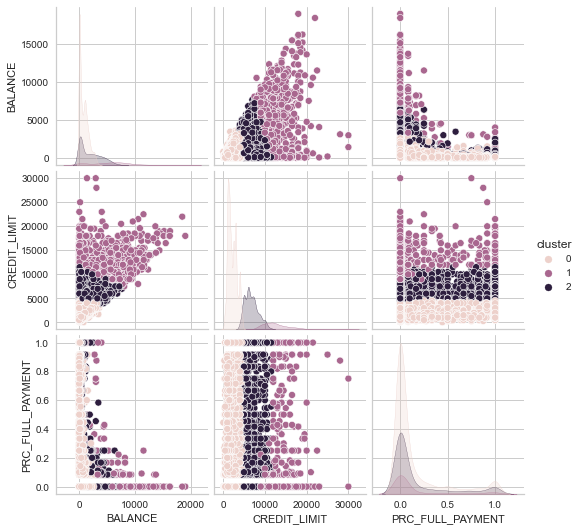

In [3]:
df1 = df_crc[['BALANCE','CREDIT_LIMIT','PRC_FULL_PAYMENT']]

model_1 = KMeans(3)
labels = model_1.fit_predict(df1.values)
df1['cluster'] = labels

sns.pairplot(df1, hue='cluster')

подбором оптимальное количество кластеров - 3; получили три группы:
1. высокий баланс, высокий лимит кредитной карты, высокий оплаченный процент;
2. средний баланс, средний лимит кредитной карты, средний оплаченный процент;
3. низкий баланс, низкий лимит кредитной карты, низкий оплаченный процент

### normal  
##### определить количество кластеров при помощи метода Elbow
##### вывести график с разделением на группы в координатах `BALANCE`-`PURCHASES` и `BALANCE`-`PURCHASER_INSTALLMENTS_FREQUENCY`; видны ли какие-то закономерности?

определение количества кластеров при помощи метода Elbow

In [8]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

Text(0.5, 1.0, 'Elbow method')

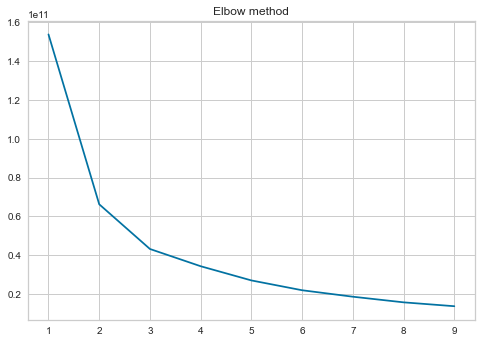

In [9]:
distances = [distance_by_n(df1, n) for n in range(1, 10)]
plt.plot(range(1, 10), distances)
plt.title('Elbow method')

оптимальное число кластеров - 2 или 3

**график с разделением на группы в координатах BALANCE-PURCHASES (баланс - покупки)**

In [26]:
df2 = df_crc[['BALANCE','PURCHASES']]

Text(0.5, 1.0, 'Elbow method')

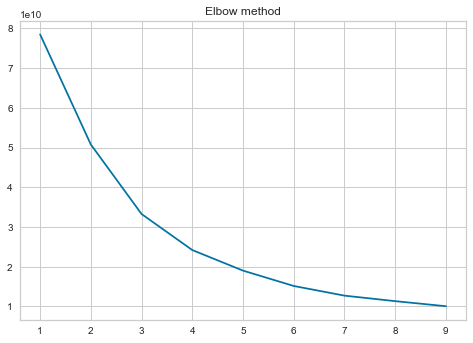

In [27]:
distances = [distance_by_n(df2, n) for n in range(1, 10)]
plt.plot(range(1, 10), distances)
plt.title('Elbow method')

C:\Users\79216\AppData\Local\Temp/ipykernel_19884/342100122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = labels


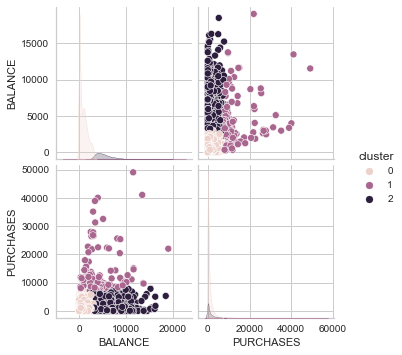

In [31]:
model_2 = KMeans(3)
labels = model_2.fit_predict(df2.values)
df2['cluster'] = labels

sns.pairplot(df2, hue='cluster')

однозначно можно сказать, что бедные люди (с маленьким балансом) совершают мало покупок; а вот богатые люди (с высоким балансом) не однородны: некоторые тратят, а некоторые копят

**график с разделением на группы в координатах BALANCE-PURCHASER_INSTALLMENTS_FREQUENCY (баланс - частота совершения покупок в рассрочку)**

In [34]:
df3 = df_crc[['BALANCE','PURCHASES_INSTALLMENTS_FREQUENCY']]

Text(0.5, 1.0, 'Elbow method')

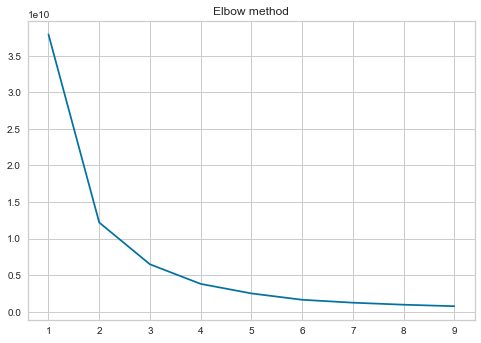

In [35]:
distances = [distance_by_n(df3, n) for n in range(1, 10)]
plt.plot(range(1, 10), distances)
plt.title('Elbow method')

C:\Users\79216\AppData\Local\Temp/ipykernel_19884/3752737530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = labels


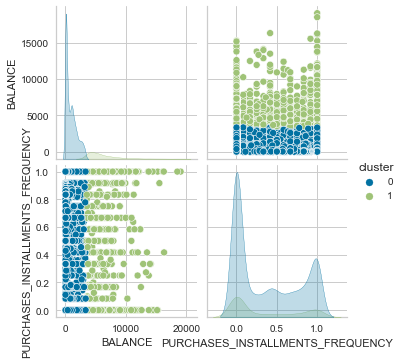

In [38]:
model_3 = KMeans(2)
labels = model_3.fit_predict(df3.values)
df3['cluster'] = labels

sns.pairplot(df3, hue='cluster')

тут чёткого распределения нет; условно можно сказать, что бедные чаще совершают покупки в рассрочку; в целом же и среди бедных, и среди богатых, есть те, которые вообще не совершают покупок в рассрочку и те, кто делает это очень часто